# Pymaceuticals Inc.
---

### Analysis

This dataset is an analysis of 248 unique mice using 10 different anti-cancer medications, tracking comparison of various timepoints and tumor volumes. The analysis further breaks down individual mouse gender, as well as days of treatment and weight of mouse and tumor volume with the drug remgimen Capomulin.

### Observations 

 - Perhaps the easiest observation comes from the gender study as male and female mice were almost evenly populated. Given that the data is not weighted more based on gender we can assume that all the data is evenly weighted across all results, regardless of gender.

- We can assume that the two drugs with the most timepoints, Capomulin and Ramicane, were given the most attention in the study or that they had the lowest death rate, as there are more timepoints than in other drugs. We cam aslo draw the inverse corollary with Propiva, being that it has the fewest timepoints and may have either had a highest death rate or was not given the most attention.  

- Of the four targeted drug regimens, Capomulin, Ramicane, Infubinol, and Ceftamin, the first two showed the smallest tumors by volume and thus showed the best indication of treatment. While there was an outlier in Infubinol, the greater subset of data shows that there is the same degree of tumor sizing with Ceftamin. This outlier should be researched more specifically to rule out error and other underlying factors. 

- Further study was done on Capomulin and the number of days until effect. The analysis shows that regression of the tumor by volume appears to start around day 20. However, it appears that the drug may actually cause the tumor to grow approximately 1-2% before shrinking again. More information is needed as it appears as though the amount of lapsed time with tumor regrowth (between days appx. 35-45) had doubled from the initial shrinking around day 20. This would concur with the idea that the regimen was working regardless if there was a progression of the tumor size. Or it may also show the drug stops working around day 35.

- Finally, for Capomulin, the final weight of the mouse was correlated with the average volume of thier tumor. Given that the mouse would weigh more as the tumor by volume is larger is a positive correlation. Thus the linear relation of this data. 


 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_count = mouse_study_complete['Mouse ID'].nunique()
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study_complete[mouse_study_complete['Mouse ID']=="g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_complete[mouse_study_complete['Mouse ID']!='g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_df['Mouse ID'].unique())
clean_mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped = clean_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
summary_stats.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Std Deviation',
    'sem': 'Std Error of Mean'
}, inplace=True)

summary_stats


,Mean,Median,Variance,Std Deviation,Std Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line - this version has been cleaned to have columns renamed to be easier to read
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']) \
    .rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Std Deviation', 'sem': 'Std Error of Mean'})
summary_stats

,Mean,Median,Variance,Std Deviation,Std Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

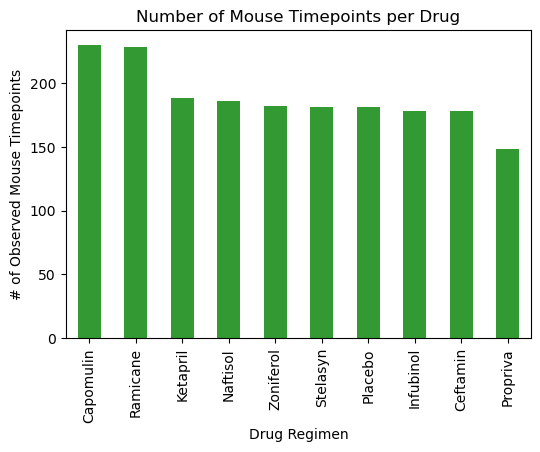

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Data Setup
regimen_count = clean_df['Drug Regimen'].value_counts()

#Plot and Label
pandabar_count = regimen_count.plot(kind='bar', figsize=(6, 4), color='#339933', ylabel="# of Observed Mouse Timepoints", 
                   title="Number of Mouse Timepoints per Drug")

#Cleanup
plt.show()

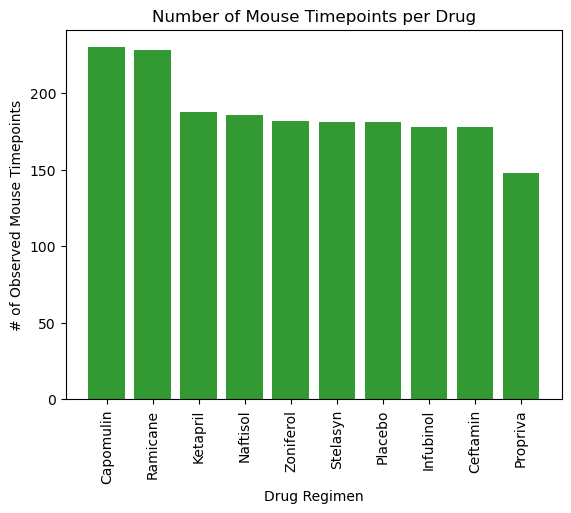

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Data Setup
regimen = regimen_count.index
counts = regimen_count.values

#Plot
plt.bar(regimen, counts, color='#339933')

#Label
plt.title("Number of Mouse Timepoints per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#Cleanup
plt.xticks(rotation=90)
plt.show()

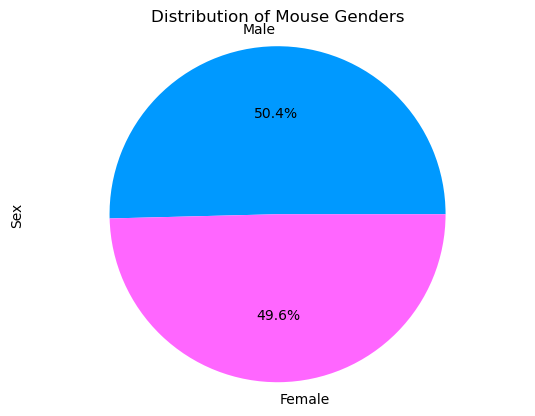

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Please Take note: The original pie chart had calculations of 51% to 49% male to female ratios. I believe that this
#data was generated with the clean dataframe that still had multiple timepoints which skews the data slightly. 
#Of the 248 mice in a single timeframe the below data shows the correct percentages of Male to Female mice.

#Data Setup
unique_sex = clean_df.drop_duplicates(subset=['Mouse ID'])[['Mouse ID', 'Sex']]
genders = unique_sex['Sex'].value_counts()

#Plot and Label
genders.plot.pie(autopct='%1.1f%%', colors=['#0099FF', '#FF66FF'], ylabel="Sex", title="Distribution of Mouse Genders")

#Cleanup
plt.axis('equal')
plt.show()

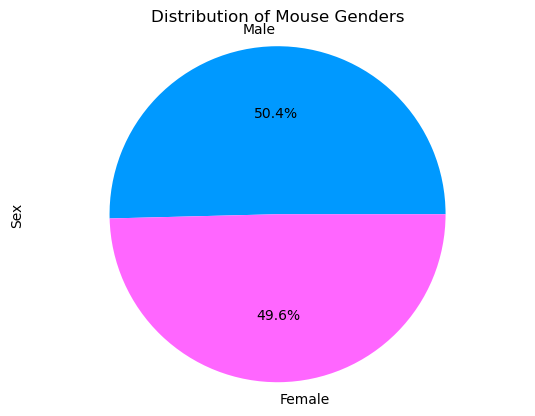

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Please Take note: The original pie chart had calculations of 51% to 49% male to female ratios. I believe that this
#data was generated with the clean dataframe that still had multiple timepoints which skews the data slightly. 
#Of the 248 mice in a single timeframe the below data shows the correct percentages of Male to Female mice.

#Data Setup
gender_data = genders.values.tolist()
gender_labels = genders.index.tolist()

#Plot
plt.pie(gender_data, labels=gender_labels, autopct='%1.1f%%', colors=['#0099FF', '#FF66FF'])

#Label
plt.title("Distribution of Mouse Genders")
plt.ylabel("Sex")

#Cleanup
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_merged = clean_df.merge(greatest_timepoint, on=['Mouse ID', 'Timepoint'])

#Index to zero
greatest_merged = greatest_merged.reset_index(drop=True)
greatest_merged


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = greatest_merged[greatest_merged['Drug Regimen']==treatment]['Tumor Volume (mm3)'].values
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    Q1 = np.percentile(tumor_vol, 25)
    Q3 = np.percentile(tumor_vol, 75)
    IQR = Q3 - Q1
    
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    
    outliers = [value for value in tumor_vol if value < LB or value > UB]
    
    print(f"{treatment}'s potential outliers:  {outliers}")


Capomulin's potential outliers:  []
Ramicane's potential outliers:  []
Infubinol's potential outliers:  [36.3213458]
Ceftamin's potential outliers:  []


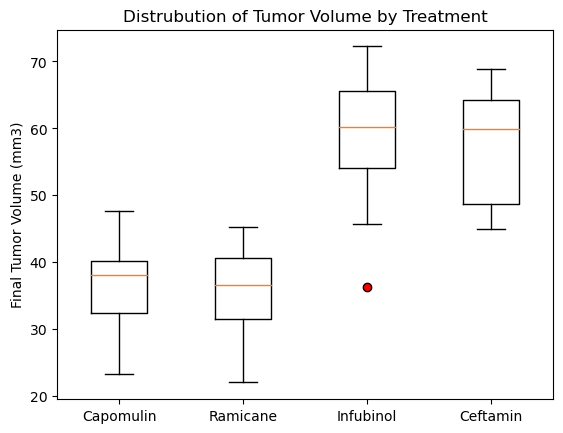

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='#FF0000'))
ax.set_title("Distrubution of Tumor Volume by Treatment")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

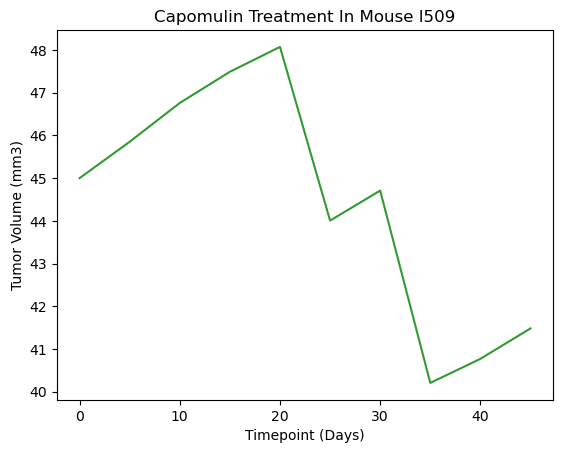

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Data Setup
time_points = clean_df[clean_df['Mouse ID']=='l509']['Timepoint'].values
tumor_vol_1509 = clean_df[clean_df['Mouse ID']=='l509']['Tumor Volume (mm3)'].values

#Plot
fig, ax = plt.subplots()
ax.plot(time_points, tumor_vol_1509, color='#339933')

#Label
ax.set_title("Capomulin Treatment In Mouse l509")
ax.set_xlabel("Timepoint (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

#Cleanup
plt.show()

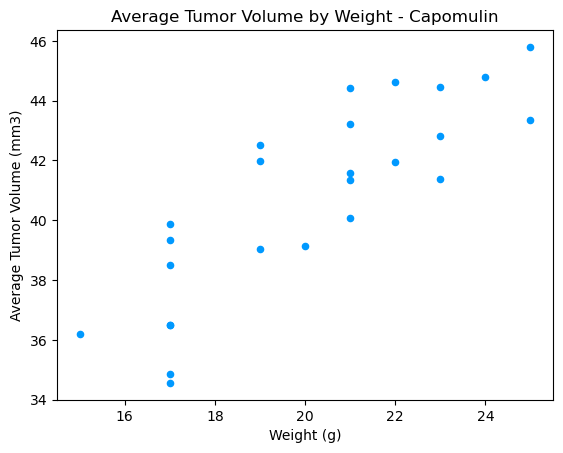

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Data
capomulin_data = clean_df[clean_df['Drug Regimen']=="Capomulin"]
capomulin_weight = capomulin_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

#Plot and Label
scatter = capomulin_weight.plot(kind="scatter",x="Weight (g)", y="Tumor Volume (mm3)", color='#0099FF',
                                   title="Average Tumor Volume by Weight - Capomulin",
                                   xlabel="Weight (g)", ylabel="Average Tumor Volume (mm3)")

#Cleanup
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume on the Capomulin is 0.84.


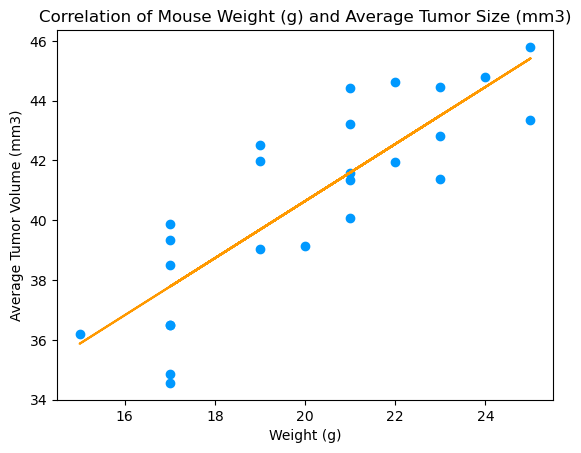

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#Data Setup
x= capomulin_weight["Weight (g)"]
y= capomulin_weight["Tumor Volume (mm3)"]

#Correlation
correlation = st.pearsonr(x,y)
print(f"The correlation between weight and average tumor volume on the Capomulin is {round(correlation[0],2)}.")

#Linear Regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(x,y)

#Linear Regression Line
regression = x * slope + intercept

#Plot
plt.scatter(x,y, color='#0099FF')
plt.plot(x,regression,'#FF9900')

#Label
plt.title("Correlation of Mouse Weight (g) and Average Tumor Size (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Cleanup
plt.show()